<a href="https://colab.research.google.com/github/mks999/DML_Economics/blob/main/Data_imputation_AggEmp_EQ_IMF_19.8.25_MHTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary packages
!pip install pandas openpyxl scikit-learn

import pandas as pd
import numpy as np


In [2]:
# Load the Excel file directly from the provided link
file_url = '/content/imput Agg. emp EQI IMF.xlsx'
df = pd.read_excel(file_url)
df.head()


,country,time,mhtx,rnd,tariff,mobile,uv_index,gfcf,fdi,lnwages,...,aggemp,ctryid,dmy_uvindex,dmy_mhtx,msch,internet,covid_dummy,L_aggemp,EQI_IMF,dmy_EQIimf
0,Argentina,1990,23.6244,0.472133,14.550,0.036767,40.5,13.9970,1.29888,22.4846,...,46.6,1,0.0,0.0,8.12256,0.436837,0,NaN,0.759662,0
1,Argentina,1991,23.6244,0.472133,12.383,0.075516,50.2,14.6370,1.28558,22.7368,...,47.0,1,0.0,0.0,8.19000,0.246292,0,46.6,0.778993,0
2,Argentina,1992,23.6244,0.450528,12.660,0.138792,52.4,16.7024,1.93679,22.6555,...,47.3,1,0.0,0.0,8.25800,0.326213,0,47.0,0.769512,0
3,Argentina,1993,28.9722,0.441513,12.530,0.329148,52.9,19.6881,1.17980,22.7717,...,47.1,1,0.0,0.0,8.32600,0.259685,0,47.3,0.784713,0
4,Argentina,1994,30.0064,0.436208,11.723,0.699252,57.3,19.9656,1.41195,22.8847,...,44.8,1,0.0,0.0,8.39400,0.236687,0,47.1,0.785171,0


In [3]:
# Replace all missing value placeholders with np.nan
df = df.replace(['..', '...', 'NA', 'na', '', None], np.nan)

# Select only numeric columns for imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]


In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Setup the MICE imputer with Random Forest
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=0),
    max_iter=10,
    random_state=0,
    # sample_posterior=True # Removed because RandomForestRegressor does not support return_std
)

# Fit and transform the numeric data
imputed_array = imputer.fit_transform(df_numeric)
df_imputed = pd.DataFrame(imputed_array, columns=numeric_cols)

In [5]:
# Merge imputed numeric columns back into the original dataframe
df_final = df.copy()
df_final[numeric_cols] = df_imputed

# Save the imputed dataset to CSV (optional)
df_final.to_csv('imputed_AggEMP_EQ_IMF_19.8.25_Data.csv', index=False)

# Preview the result
df_final.head()


,country,time,mhtx,rnd,tariff,mobile,uv_index,gfcf,fdi,lnwages,...,aggemp,ctryid,dmy_uvindex,dmy_mhtx,msch,internet,covid_dummy,L_aggemp,EQI_IMF,dmy_EQIimf
0,Argentina,1990.0,23.6244,0.472133,14.550,0.036767,40.5,13.9970,1.29888,22.4846,...,46.6,1.0,0.0,0.0,8.12256,0.436837,0.0,46.0358,0.759662,0
1,Argentina,1991.0,23.6244,0.472133,12.383,0.075516,50.2,14.6370,1.28558,22.7368,...,47.0,1.0,0.0,0.0,8.19000,0.246292,0.0,46.6000,0.778993,0
2,Argentina,1992.0,23.6244,0.450528,12.660,0.138792,52.4,16.7024,1.93679,22.6555,...,47.3,1.0,0.0,0.0,8.25800,0.326213,0.0,47.0000,0.769512,0
3,Argentina,1993.0,28.9722,0.441513,12.530,0.329148,52.9,19.6881,1.17980,22.7717,...,47.1,1.0,0.0,0.0,8.32600,0.259685,0.0,47.3000,0.784713,0
4,Argentina,1994.0,30.0064,0.436208,11.723,0.699252,57.3,19.9656,1.41195,22.8847,...,44.8,1.0,0.0,0.0,8.39400,0.236687,0.0,47.1000,0.785171,0


In [ ]:
import pandas as pd
import numpy as np

# Load your imputed data
df1 = pd.read_csv('imputed_AggEMP_EQ_IMF_19.8.25_Data.csv')

# Sort for panel structure
df1 = df.sort_values(['Country', 'Time'])


Attempting to load raw data from: /content/imput Agg. emp EQI IMF.xlsx
Attempting to load imputed data from: /content/imputed_AggEMP_EQ_IMF_19.8.25_Data.csv


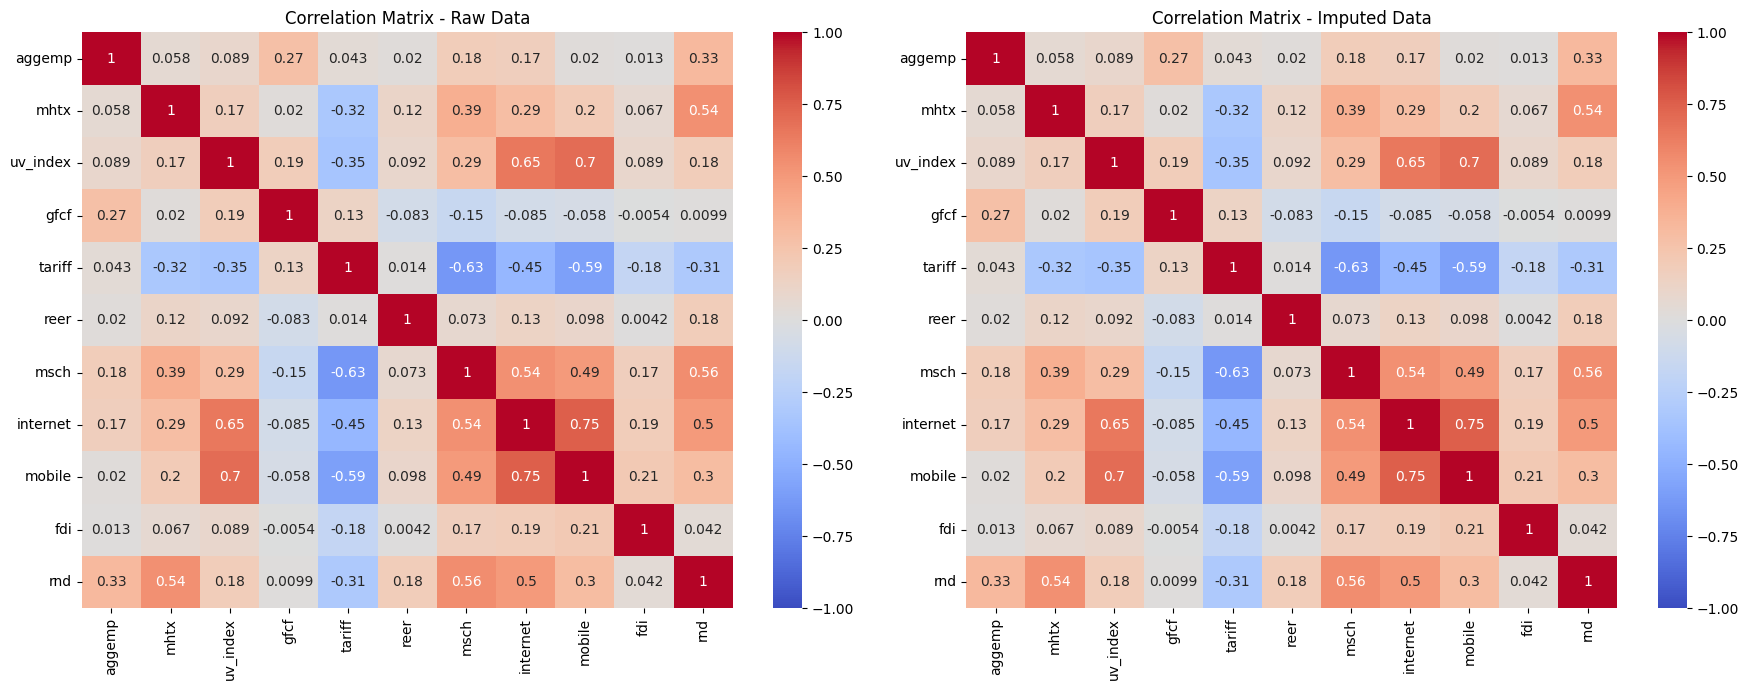

Correlation matrix - Raw Data:
          aggemp   mhtx  uv_index   gfcf  tariff   reer   msch  internet  \
aggemp     1.000  0.058     0.089  0.274   0.043  0.020  0.184     0.167   
mhtx       0.058  1.000     0.169  0.020  -0.324  0.116  0.386     0.292   
uv_index   0.089  0.169     1.000  0.187  -0.348  0.092  0.291     0.650   
gfcf       0.274  0.020     0.187  1.000   0.130 -0.083 -0.150    -0.085   
tariff     0.043 -0.324    -0.348  0.130   1.000  0.014 -0.634    -0.453   
reer       0.020  0.116     0.092 -0.083   0.014  1.000  0.073     0.130   
msch       0.184  0.386     0.291 -0.150  -0.634  0.073  1.000     0.543   
internet   0.167  0.292     0.650 -0.085  -0.453  0.130  0.543     1.000   
mobile     0.020  0.203     0.698 -0.058  -0.587  0.098  0.495     0.755   
fdi        0.013  0.067     0.089 -0.005  -0.175  0.004  0.166     0.187   
rnd        0.327  0.544     0.181  0.010  -0.305  0.181  0.561     0.497   

          mobile    fdi    rnd  
aggemp     0.020  0.013

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy for np.nan
import os # Import os module to check for file existence

# List of variables to include
cols = [
    'aggemp', 'mhtx', 'uv_index', 'gfcf', 'tariff', 'reer', 'msch',
    'internet', 'mobile', 'fdi', 'rnd'
]

# Define file paths
raw_file_path = '/content/imput Agg. emp EQI IMF.xlsx'
imputed_file_path = '/content/imputed_AggEMP_EQ_IMF_19.8.25_Data.csv'
print(f"Attempting to load raw data from: {raw_file_path}")
print(f"Attempting to load imputed data from: {imputed_file_path}")

# Check if imputed file exists
if not os.path.exists(imputed_file_path):
    print(f"Error: The imputed data file '{imputed_file_path}' was not found.")
    print("Please ensure the cell that saves the imputed data (cell JjO-zEkee9ps) was run successfully.")
else:
    try:
        df_raw = pd.read_excel(raw_file_path) # Load original data from Excel
        # Replace missing value placeholders with np.nan in the raw data
        df_raw = df_raw.replace(['..', '...', 'NA', 'na', '', None], np.nan)
        # Ensure all variables are numeric
        df_raw = df_raw[cols].apply(pd.to_numeric, errors='coerce')

        df_imp = pd.read_csv(imputed_file_path) # Load imputed data from the correct CSV
        # Ensure all variables are numeric
        df_imp = df_imp[cols].apply(pd.to_numeric, errors='coerce')


        # Compute correlation matrices
        cor_raw = df_raw.corr(numeric_only=True)
        cor_imp = df_imp.corr(numeric_only=True)


        # Plot correlation matrices side by side
        plt.figure(figsize=(18, 7))

        plt.subplot(1, 2, 1)
        sns.heatmap(cor_raw, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix - Raw Data')

        plt.subplot(1, 2, 2)
        sns.heatmap(cor_imp, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix - Imputed Data')

        plt.tight_layout()
        plt.show()

        # Print correlation matrices
        print('Correlation matrix - Raw Data:')
        print(cor_raw.round(3))

        print('\nCorrelation matrix - Imputed Data:')
        print(cor_imp.round(3))

    except FileNotFoundError as e:
        print(f"Error loading file: {e}. Please ensure the files exist at the specified paths.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")